## Taking mass out of a black hole

This is an example that comes straight out of my research in general relativity. This is our paper:

**Gerosa, Fabbri, Sperhake (2022)** "*The irreducible mass and the horizon area of LIGO's black holes*" [arxiv:2202.08848](https://arxiv.org/abs/2202.08848) 

(some of the calculations were first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

You don't need to understand the details to complete this question but, in brief, rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some General Relativity to understand this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation)). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou (1970)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of [black-hole thermodynamics](https://en.wikipedia.org/wiki/Black_hole_thermodynamics)).


For a BH of mass $M$ and spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\end{equation}
For convenience, let us define $f= M_{\rm irr}/M$

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from [what we are now measuring](https://arxiv.org/abs/2111.03606) with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.


**Tasks**:

1. First compute the pdf of $f$, that is just a change of variable. We saw how to do this. Verify that the answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}


2. Sample this pdf using at least two methods and compare the results. (We've seen accepance/rejection and inverse transform, but there's another, very trivial method you can use! Hint: work with the samples...)

3. Then compute the pdf of $M_{\rm irr}$. You'll need to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If so please tell me!)
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,.
\end{equation}

4. Sample this pdf using at least two methods and compare the results. Start with a value of $\sigma=0.02$ but then change it and see what happens. Note that $\mu$ is a free scale of the problem and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$ (i.e. it's ok to just set $\mu=1$ in your code provided you remember that all your masses are measured in units of $\mu$). 

#### Task 1
Given $\chi$ uniform, we have $\pi_\Chi(\chi)=1$. So, in the change of variable formula: $$\pi_f(f)=\pi_\Chi(\chi)\left|\frac {d\chi}{df}\right|$$ we have: $$\pi_f(f)=1\left|\frac {d\chi}{df}\right|$$

Now, $f=\sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$, but we need $\chi$ to perform $\frac{d\chi}{df}$. After rearranging some terms: $$\chi = \pm\sqrt{1-(2f^2-1)^2}$$

Note that $\chi\in[0,1]$, so we keep only the positive part. Now we do the derivative of $\chi$ with respect to $f$.

$\frac{d}{df} \sqrt{1-(2f^2-1)^2}\implies \frac 1 {2\sqrt{1-(2f^2-1)^2}} \cdot (-2(2f^2-1)\cdot 4f) \implies -\frac {(4f^2-2)\cdot 8f} {2\sqrt{1-(2f^2-1)^2}}\implies -\frac {(2f^2-1)\cdot 4f} {\sqrt{1-(2f^2-1)^2}}$

Remember that we need the absolute value instead: $\frac {|2f^2-1|\cdot 4f} {\sqrt{1-(2f^2-1)^2}}$

Which simplifies to: $$\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}$$

#### Task 2
##### Rejection sampling

Given our pdf: $$\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}} \qquad \sqrt{(1/2)} \leq f \leq 1$$

We need to choose a proposal distribution $g(f)$. Since $f$ takes value in $\sqrt{(1/2)}$ and $1$, one simple proposal distribution is the Gaussian distribution. Since $f$ is not centered in $0$, we need to properly set $\mu$. In this case we use the median.

$$g(f)=\mathcal N(\frac{\sqrt 2 + 2}{4}, 0.02^2)$$

Now we must find an upper bound $M$ such that $\pi(f)\leq Mg(f),\forall f$. The acceptance probability is $u\leq \frac{\pi(f*)}{Mg(f*)}$, where $f*$ is the sample.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# PDF
pdf = lambda f: 2 * (2 * f**2 - 1) / (np.sqrt(1 - (f)**2))

# Proposal parameters for Gaussian
prop_mean = (np.sqrt(2) + 2) / 4
prop_std = 0.2

# Proposal function
g = lambda f: norm.pdf(f, loc=prop_mean, scale=prop_std)

# Find M
f_vals = np.linspace(np.sqrt(0.5), 1, 1000)
M = max(pdf(f_vals) / g(f_vals)) * 1.2 # Small buffer
print(M)


def rejection_algorithm(n_samples):
    samples = []
    while len(samples) < n_samples:
        f_sample = np.random.normal(prop_mean, prop_std) # Sample from g(f)
        u = np.random.uniform(0, 1)

        # Acceptance criterion
        if u < pdf(f_sample) / (M * g(f_sample)):
            samples.append(f_sample)

    return np.array(samples)

if M == np.inf:
    print("M is INF: Algorithm will endlessly reject all samples!")
else:
    n_samples = 100
    samples = rejection_algorithm(n_samples)


inf
M is INF: Algorithm will endlessly reject all samples!


C:\Users\andre\AppData\Local\Temp\ipykernel_2344\2519229568.py:6: RuntimeWarning: divide by zero encountered in divide
  pdf = lambda f: 2 * (2 * f**2 - 1) / (np.sqrt(1 - (f)**2))


That's not good. Indeed, $M$ goes to inf when $f$ approaches 1. We need to choose a distribution that addresses this problem. We opt for a beta distribution.

In [4]:
from scipy.stats import beta

# Proposal parameters for Beta
a = 1 / np.sqrt(2)
b = 1.0

# PDF
def pdf(f):
    num = 2 * (2 * f**2 - 1)
    den = np.sqrt(1 - (f)**2)
    return np.where((f >= a) & (f <= b), num / den, 0.0)

# Scaled Beta proposal distribution (Beta(1, 0.5) scaled to [a, b])
def sample_proposal(n):
    z = beta.rvs(1, 0.5, size=n)
    return a + z * (b - a)

def g(f):
    z = (f - a) / (b - a)
    return np.where((f >= a) & (f <= b), beta.pdf(z, 1, 0.5) / (b - a), 0.0)

# Calculate M
f_vals = np.linspace(a, b, 100000)[:-1]  # Exclude b to avoid division by zero
ratio = pdf(f_vals) / g(f_vals)
M = np.max(ratio) * 1.2  # Adding buffer

# Rejection sampling algorithm
def rejection_algorithm(n_samples):
    samples = []
    while len(samples) < n_samples:
        y = sample_proposal(1)[0]
        u = np.random.uniform(0, 1)
        if u < pdf(y) / (M * g(y)):
            samples.append(y)
    return np.array(samples)

n_samples = 10000
samples = rejection_algorithm(n_samples)

C:\Users\andre\AppData\Local\Temp\ipykernel_2344\1452068688.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.where((f >= a) & (f <= b), num / den, 0.0)


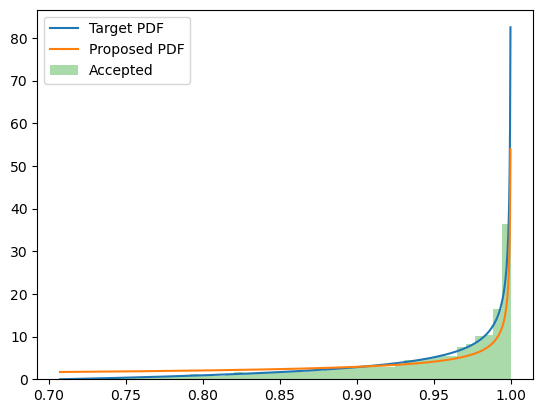

In [5]:
x = np.linspace(a, b, 1000)
plt.plot(x, pdf(x), label='Target PDF')
plt.plot(x, g(x), label='Proposed PDF')
plt.hist(samples, bins=50, density=True, alpha=0.4, label="Accepted", edgecolor='none')

plt.legend()

plt.show()

##### Inverse transform sampling
Our pdf is $\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}$. To compute the CDF, we need to integrate $\pi(f)$ from $\sqrt(1/2)$ to $f$. While complex, we can make python and scipy do the hard work. Now, we can apply the inverse of the CDF to a random number $u$, let's say, between $0$ and $1$, to sample.


In [6]:
import scipy.integrate as integrate
import scipy.optimize as optimize

# PDF
def pdf(f):
    num = 2 * (2 * f**2 - 1)
    den = np.sqrt(1 - (f)**2)
    return np.where((f >= a) & (f <= b), num / den, 0.0)

# CDF
def cdf(f):
    result, _ = integrate.quad(pdf, np.sqrt(0.5), f)
    return result

# Inverse CDF
def inverse_cdf(u):
    result = optimize.brentq(lambda f: cdf(f) - u, np.sqrt(1/2), 1 - 1e-10)
    return result
    
def generate_samples(num_samples):
    samples = []
    for _ in range(num_samples): # Not a while loop: no rejections!
        u = np.random.uniform(0, 1) # Generate uniform random variable
        sample = inverse_cdf(u) # Apply inverse CDF to get the sample
        samples.append(sample)
    return np.array(samples)


n_samples = 10000
samples = generate_samples(n_samples)

C:\Users\andre\AppData\Local\Temp\ipykernel_2344\1304269277.py:8: RuntimeWarning: divide by zero encountered in divide
  return np.where((f >= a) & (f <= b), num / den, 0.0)


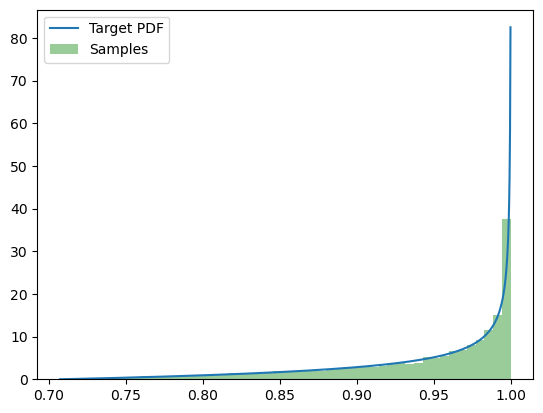

In [7]:
x = np.linspace(np.sqrt(1/2), 1, 1000)
plt.plot(x, pdf(x), label='Target PDF')
plt.hist(samples, bins=50, density=True, alpha=0.4, color='g', label='Samples', edgecolor='none')

plt.legend()

plt.show()

##### Trivial method

A pdf is the probability distribution, i.e. how probable we are getting a certain value x. Given that we already have the function, wouldn't be enough if we were to do a uniform sampling, and weight the probability by the pdf?

$f$ is defined, after all, between $\sqrt{(1/2)}$ and $1$. We perform a uniform sample within this range, and weight them by the pdf.

C:\Users\andre\AppData\Local\Temp\ipykernel_2344\1298304886.py:2: RuntimeWarning: divide by zero encountered in divide
  return 2 * (2 * f**2 - 1) / np.sqrt(1 - f**2)


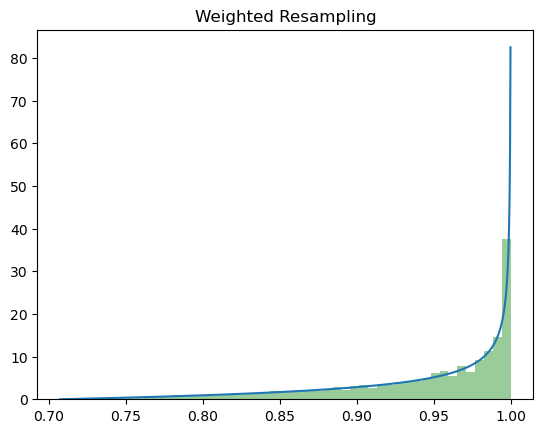

In [8]:
def pdf(f):
    return 2 * (2 * f**2 - 1) / np.sqrt(1 - f**2)

# Uniform samples across the range 
samples = np.random.uniform(np.sqrt(0.5), 1, 10000)
# The weight is the probability of having a sample of that x value
weights = pdf(samples)

# We sample from the uniform distribution, with weights as probability
resamples = np.random.choice(samples, size=10000, p=weights/np.sum(weights)) # Remember: p must sum to 1

plt.hist(resamples, bins=50, density=True, alpha=0.4, color='g', edgecolor='none')
plt.plot(x, pdf(x))
plt.title('Weighted Resampling')

plt.show()

## Task 3

$M$ is normally distributed, and the pdf of $f$ is $\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}$. We are looking for the pdf of their product $M_\text{irr} = f \cdot M$. 

We know that, given $Z=X\cdot Y$, and $p_X, p_Y$ their pdf, the pdf of $Z$ is $$p_Z(z)=\int^\infty_\infty p_X(x)p_Y(z/x)\frac 1 {|x|}dx$$

If $z$ is $M_\text{irr}$, $x$ is $f$, $Y$ is $M$, then we'd have $$p(M_\text{irr})=\int^1_{\frac{1}{\sqrt 2}} \pi(f) p_M \left(\frac{M_\text{irr}} {f}\right)\frac 1 {f}df$$

Now, since $M$ is normally distributed, with mean $\mu$ and variance $\sigma^2$, we know that $$p_M(x) = \frac {1}{\sigma \sqrt{2\pi}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$ and $\pi(f)$ is already defined as before.

Putting the pieces together, and bringing out the constant terms, we get $$p(M_\text{irr})=\frac{2}{\sigma\sqrt{2\pi}}\int^1_{\frac{1}{\sqrt 2}} \frac{2 f^2-1}{\sqrt{1 - f^2}} \exp\left[-\frac{(M_\text{irr}/f-\mu)^2}{2\sigma^2}\right]\frac 1 {f}df$$

Lastly, $\frac{2}{\sigma\sqrt{2\pi}}$ is just $\frac{\sqrt 2 \sqrt 2}{\sigma\sqrt{2\pi}}$, giving us $\frac{\sqrt{2/\pi}}{\sigma}$, thus obtaining the expected expression: $$p(M_\text{irr})=\frac{\sqrt{2/\pi}}{\sigma}\int^1_{\frac{1}{\sqrt 2}} \frac{2 f^2-1}{\sqrt{1 - f^2}} \exp\left[-\frac{(M_\text{irr}/f-\mu)^2}{2\sigma^2}\right]\frac 1 {f}df$$

# Task 4

In [9]:
import numpy as np
from scipy.integrate import quad

def p_Mirr(Mirr, mu=1.0, sigma=0.02):
    a = 1/np.sqrt(2)
    b = 1.0

    def integrand(f):
        if (f < a) or (f > b):
            return 0.0
        num = 2 * f**2 - 1
        den = f * np.sqrt(1 - f**2)
        expo = np.exp(-0.5 * ((Mirr/f - mu)/sigma)**2)
        return expo * num / den

    norm = np.sqrt(2/np.pi) / sigma
    result, _ = quad(integrand, a, b, limit=100)
    return norm * result

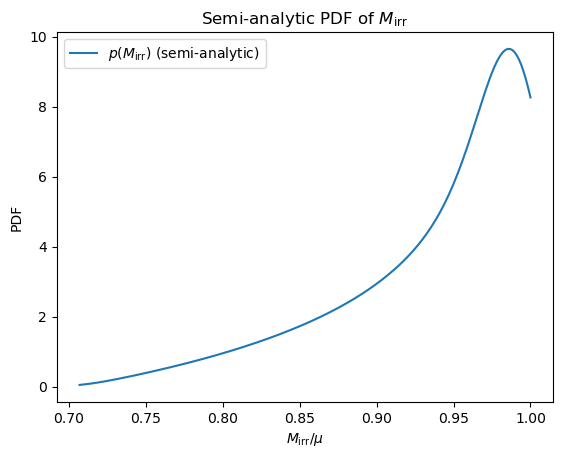

In [10]:
import matplotlib.pyplot as plt

mu = 1.0
sigma = 0.02
Mirr_vals = np.linspace(1/np.sqrt(2)*mu, mu, 200)
pdf_vals = np.array([p_Mirr(M, mu=mu, sigma=sigma) for M in Mirr_vals])

plt.plot(Mirr_vals, pdf_vals, label=r'$p(M_{\rm irr})$ (semi-analytic)')
plt.xlabel(r'$M_{\rm irr}/\mu$')
plt.ylabel('PDF')
plt.title('Semi-analytic PDF of $M_{\\rm irr}$')
plt.legend()
plt.show()

### Inverse transform sampling

To avoid nested integrations from:
1. inverse cdf uses brentq to find $M_\text{irr}$
2. cdf uses quad to solve the internal integrand
3. The internal integrand is just the pdf of $M_\text{irr}$, which uses quad to solve
4. All of which is repeated per root-finding iteration and the number of samples we want

We can instead precompute the CDF, and build an interpolator $F^{-1}(u)$ over a fine grid $u\in[0,1]$. 

In [11]:
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import interp1d

grid = np.linspace(0.7, 1.3, 1000)
pdf_vals = np.array([p_Mirr(x) for x in grid])

cdf_vals = cumulative_trapezoid(pdf_vals, grid, initial=0)
cdf_vals /= cdf_vals[-1] # normalized

inv_cdf = interp1d(cdf_vals, grid, bounds_error=False, fill_value=(grid[0], grid[-1]))
n_samples = 10000
u = np.random.rand(n_samples)
samples = inv_cdf(u)


C:\Users\andre\AppData\Local\Temp\ipykernel_2344\1372260207.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, a, b, limit=100)


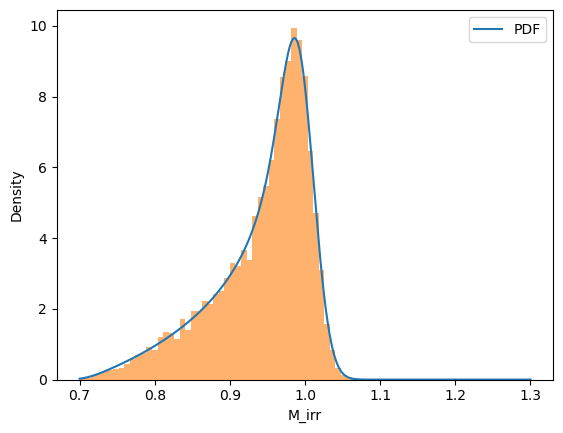

In [12]:
plt.figure()
plt.plot(grid, pdf_vals, label='PDF')
plt.hist(samples, bins=50, density=True, alpha=0.6)
plt.xlabel('M_irr')
plt.ylabel('Density')
plt.legend()
plt.show()

### Rejection sampling

In [18]:
# Find maximum of p_Mirr for proposal
Mirr_min = 0.7
Mirr_max = 1.3
Mirr_grid = np.linspace(Mirr_min, Mirr_max, 200)
pdf_grid = np.array([p_Mirr(M, mu=mu, sigma=sigma) for M in Mirr_grid])
M_max = np.max(pdf_grid) * 1.1  # Add a buffer

# Rejection sampling
n_reject = 20000
accepted = []
while len(accepted) < n_samples:
    x = np.random.uniform(Mirr_min, Mirr_max)
    y = np.random.uniform(0, M_max)
    if y < p_Mirr(x, mu=mu, sigma=sigma):
        accepted.append(x)
Mirr_reject_samples = np.array(accepted)

C:\Users\andre\AppData\Local\Temp\ipykernel_2344\1372260207.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, a, b, limit=100)


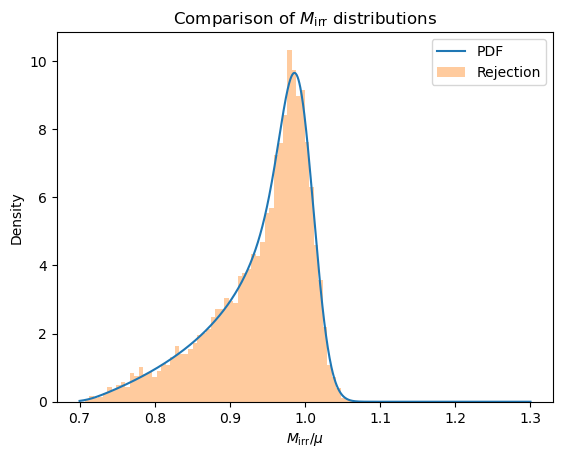

In [ ]:
plt.plot(grid, pdf_vals, label='PDF')
plt.hist(Mirr_reject_samples, bins=60, density=True, alpha=0.4, label='Rejection')
plt.xlabel(r'$M_{\rm irr}/\mu$')
plt.ylabel('Density')
plt.legend()
plt.show()

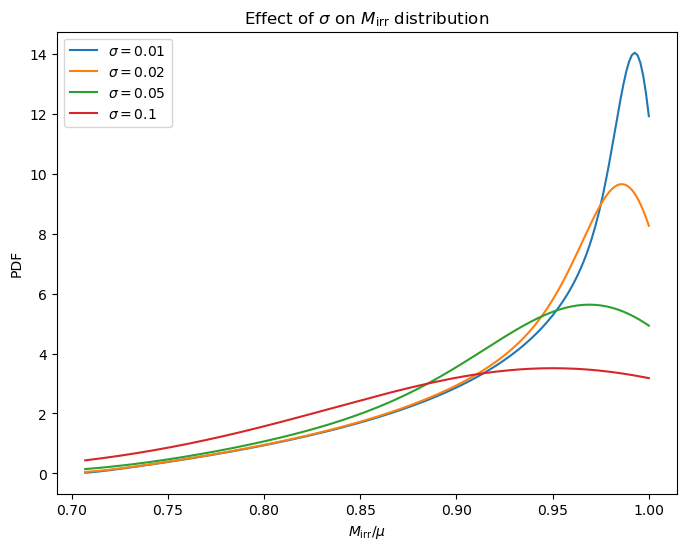

In [24]:
sigmas = [0.01, 0.02, 0.05, 0.1]
plt.figure(figsize=(8,6))
for sigma in sigmas:
    pdf_vals = np.array([p_Mirr(M, mu=mu, sigma=sigma) for M in Mirr_vals])
    plt.plot(Mirr_vals, pdf_vals, label=fr'$\sigma={sigma}$')
plt.xlabel(r'$M_{\rm irr}/\mu$')
plt.ylabel('PDF')
plt.title('Effect of $\sigma$ on $M_{\\rm irr}$ distribution')
plt.legend()
plt.show()